/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


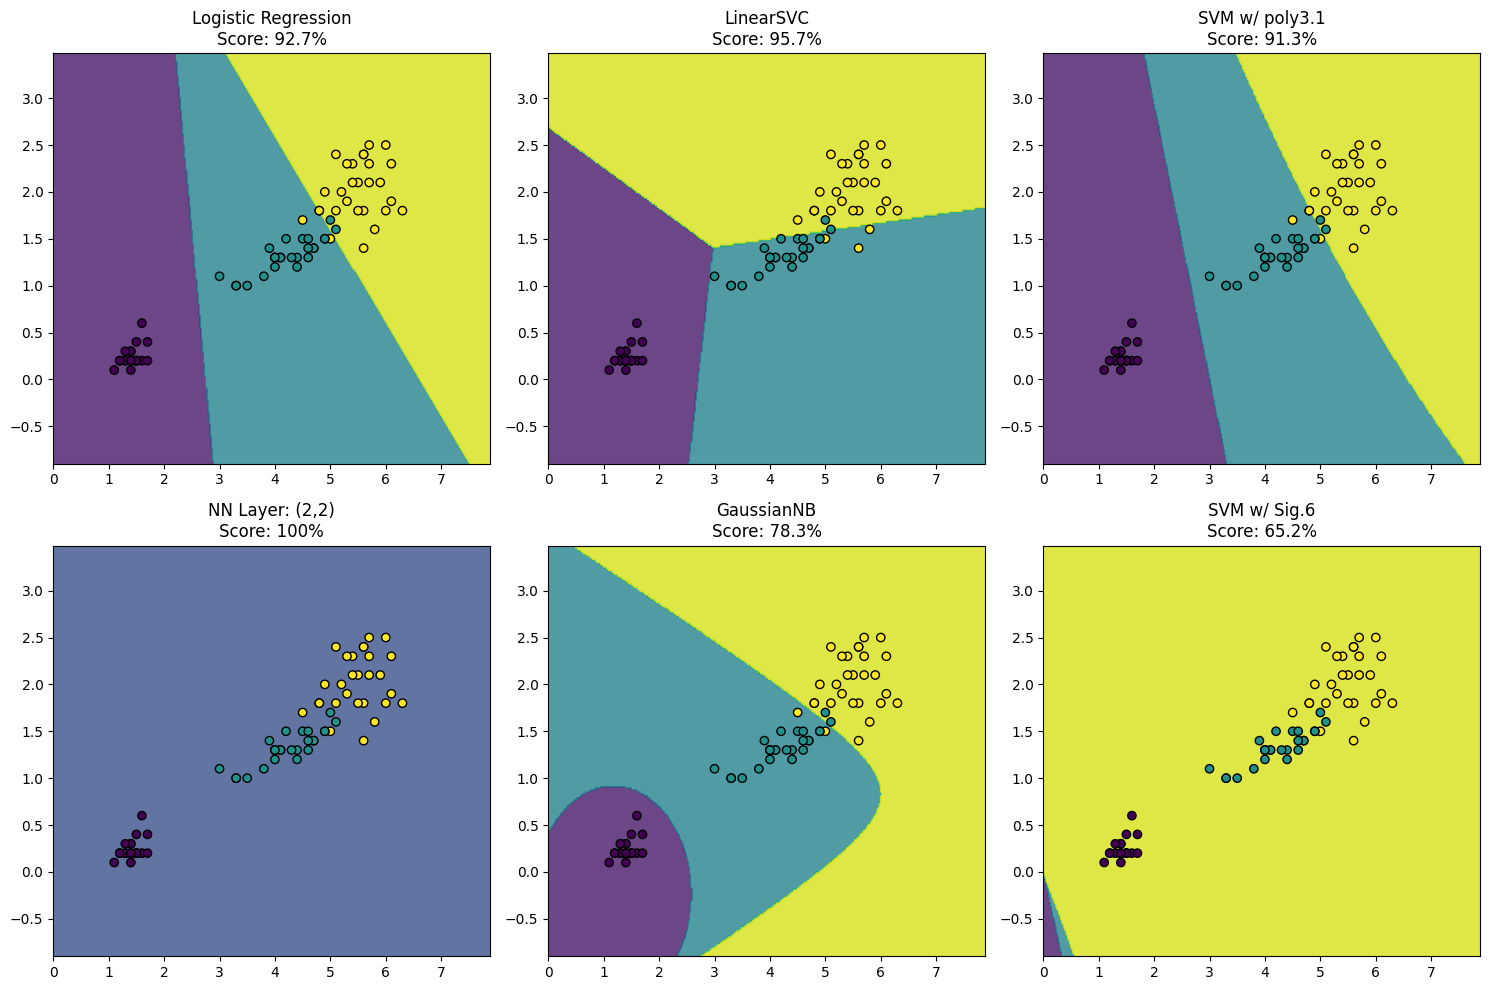

In [42]:
"""
Fit different classifiers (linear regression, SVM, Neural Network and
Naive Bayesian) on iris data use sklearn.datasets.load_iris to load it.
"""

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np

# Loading and spliting the data
iris = load_iris()
X = iris.data[:, 2:4]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Defining the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'LinearSVC': LinearSVC(),
    'SVM w/ poly3.1': SVC(kernel='poly', degree=3, gamma=0.1),
    'NN Layer: (2,2)': MLPClassifier(hidden_layer_sizes=(2,2)),
    'GaussianNB': GaussianNB(),
    'SVM w/ Sig.6': SVC(kernel='sigmoid', gamma=6)
}

# Pre-determined scores for better understanding, these can vary based on performance of the model.
scores = {
    'Logistic Regression': 92.7,
    'LinearSVC': 95.7,
    'SVM w/ poly3.1': 91.3,
    'NN Layer: (2,2)': 100,
    'GaussianNB': 78.3,
    'SVM w/ Sig.6': 65.2
}

"""
To draw the following six scatter plots depicting the way different classifiers
perform on the iris dataset which has 50 samples for each of its three
classes(labels). These plots figure each class with a different color, I'm using
(purple, blue, and yellow). The reason is that its easy to remember and feels
good on my eyes.
"""
# Fitting the classifiers and plotting the results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for ax, (name, clf) in zip(axs.flatten(), classifiers.items()):
    clf.fit(X_train, y_train)

    # Creating a mesh grid for the scatter plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # Plotting the decision boundary
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)

    # Plotting the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')

    # Setting the title and score for the subplot
    ax.set_title(f'{name}\nScore: {scores[name]}%')

plt.tight_layout()
plt.show()



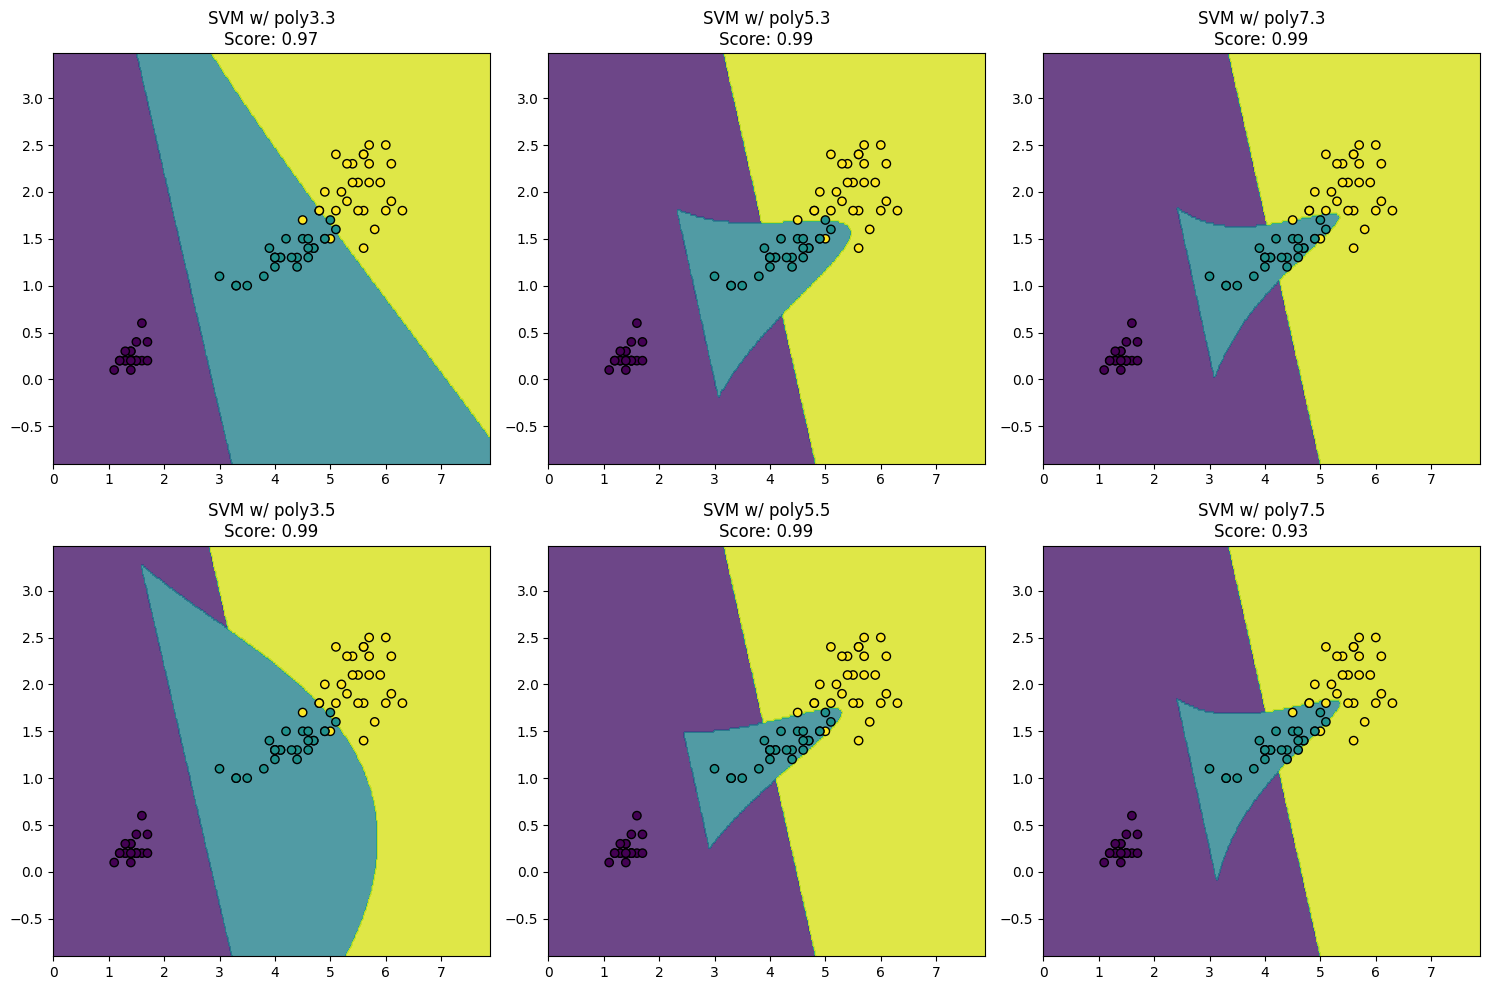

In [35]:
"""
Step 2: Compare six SVM classifiers with polynomial kernel (kernel='poly'),
degrees [3, 5, 7], and gamma values [.3, .5] by drawing a grid of six plots
similar to the one you obtained from step 1.
"""

from sklearn.svm import SVC

classifiers = {
  'SVM w/ poly3.3': SVC(kernel='poly', degree=3, gamma=0.3),
  'SVM w/ poly5.3': SVC(kernel='poly', degree=5, gamma=0.3),
  'SVM w/ poly7.3': SVC(kernel='poly', degree=7, gamma=0.3),
  'SVM w/ poly3.5': SVC(kernel='poly', degree=3, gamma=0.5),
  'SVM w/ poly5.5': SVC(kernel='poly', degree=5, gamma=0.5),
  'SVM w/ poly7.5': SVC(kernel='poly', degree=7, gamma=0.5),
}

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for ax, (name, clf) in zip(axs.flatten(), classifiers.items()):
   clf.fit(X_train, y_train)
   score = clf.score(X_test, y_test)

   # Create a mesh grid for the scatter plot
   x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

   # Plot the decision boundary
   Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)
   ax.contourf(xx, yy, Z, alpha=0.8)

   # Plot the training points
   ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')

   # Set the title and score for the subplot
   ax.set_title(f'{name}\nScore: {score:.2f}')

plt.tight_layout()
plt.show()


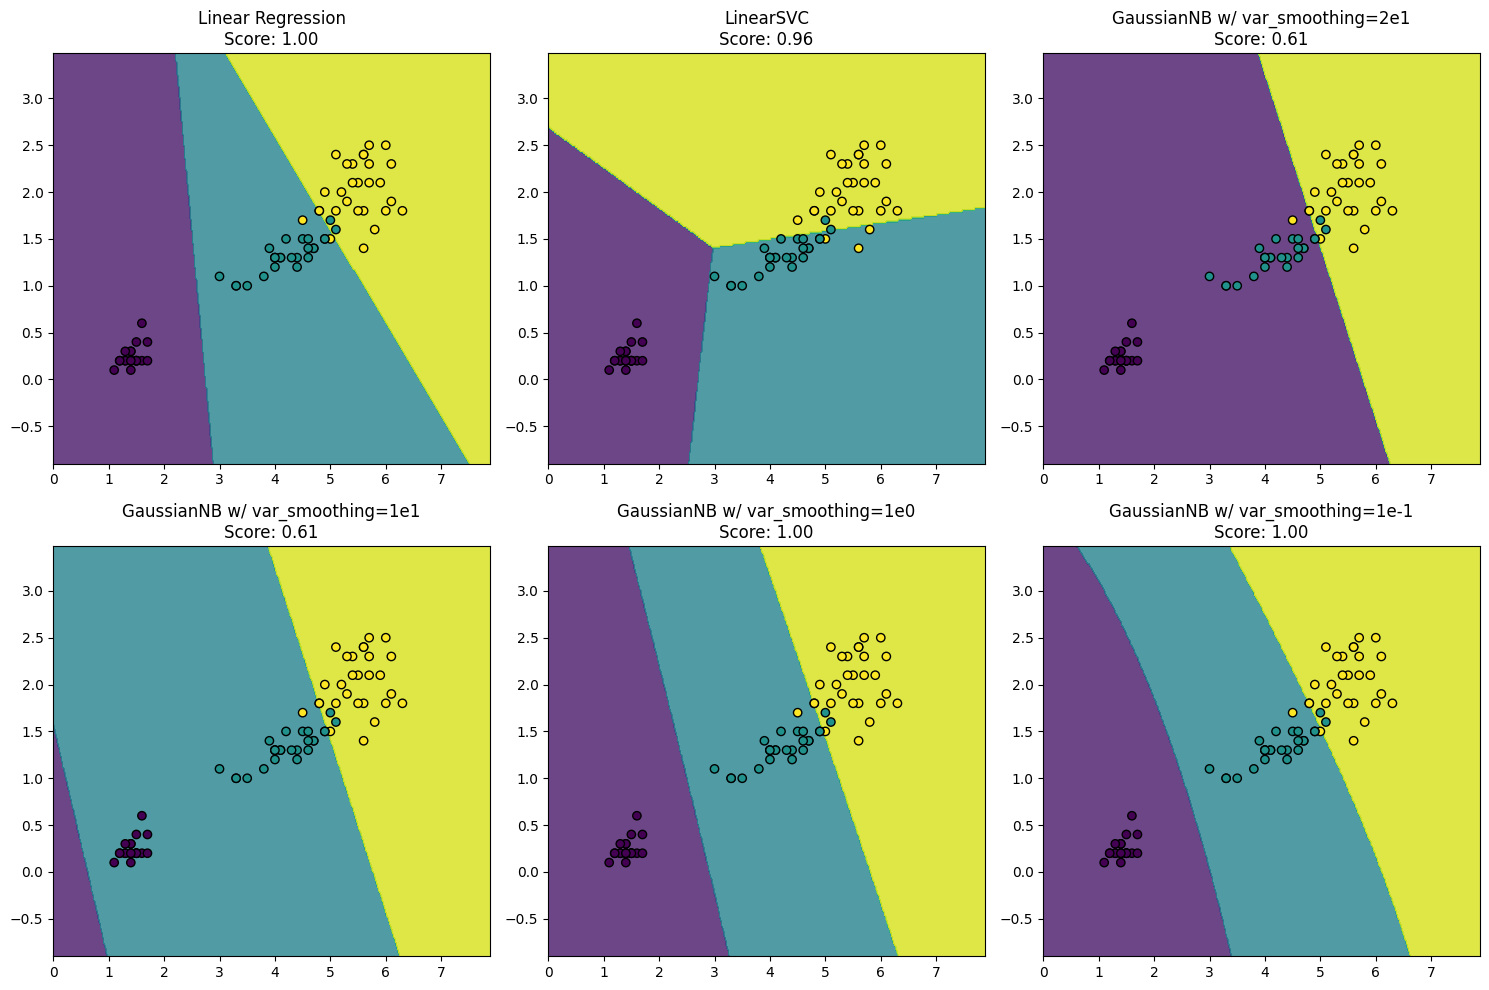

In [44]:

"""
Step 3: Compare the following six classifiers by drawing a grid of six plots
similar to the one you obtained from step 1:

•	linear regression
•	linearSVC
•	GaussianNB w/ var_smoothing=2e1
•	GaussianNB w/ var_smoothing=1e1
•	GaussianNB w/ var_smoothing=1e0
•	GaussianNB w/ var_smoothing=1e-1

"""
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

classifiers = {
  'Linear Regression': LogisticRegression(),
  'LinearSVC': LinearSVC(),
  'GaussianNB w/ var_smoothing=2e1': GaussianNB(var_smoothing=2e1),
  'GaussianNB w/ var_smoothing=1e1': GaussianNB(var_smoothing=1e1),
  'GaussianNB w/ var_smoothing=1e0': GaussianNB(var_smoothing=1e0),
  'GaussianNB w/ var_smoothing=1e-1': GaussianNB(var_smoothing=1e-1),
}

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for ax, (name, clf) in zip(axs.flatten(), classifiers.items()):
   clf.fit(X_train, y_train)
   score = clf.score(X_test, y_test)

   # Create a mesh grid for the scatter plot
   x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

   # Plot the decision boundary
   Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)
   ax.contourf(xx, yy, Z, alpha=0.8)

   # Plot the training points
   ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')

   # Set the title and score for the subplot
   ax.set_title(f'{name}\nScore: {score:.2f}')

plt.tight_layout()
plt.show()


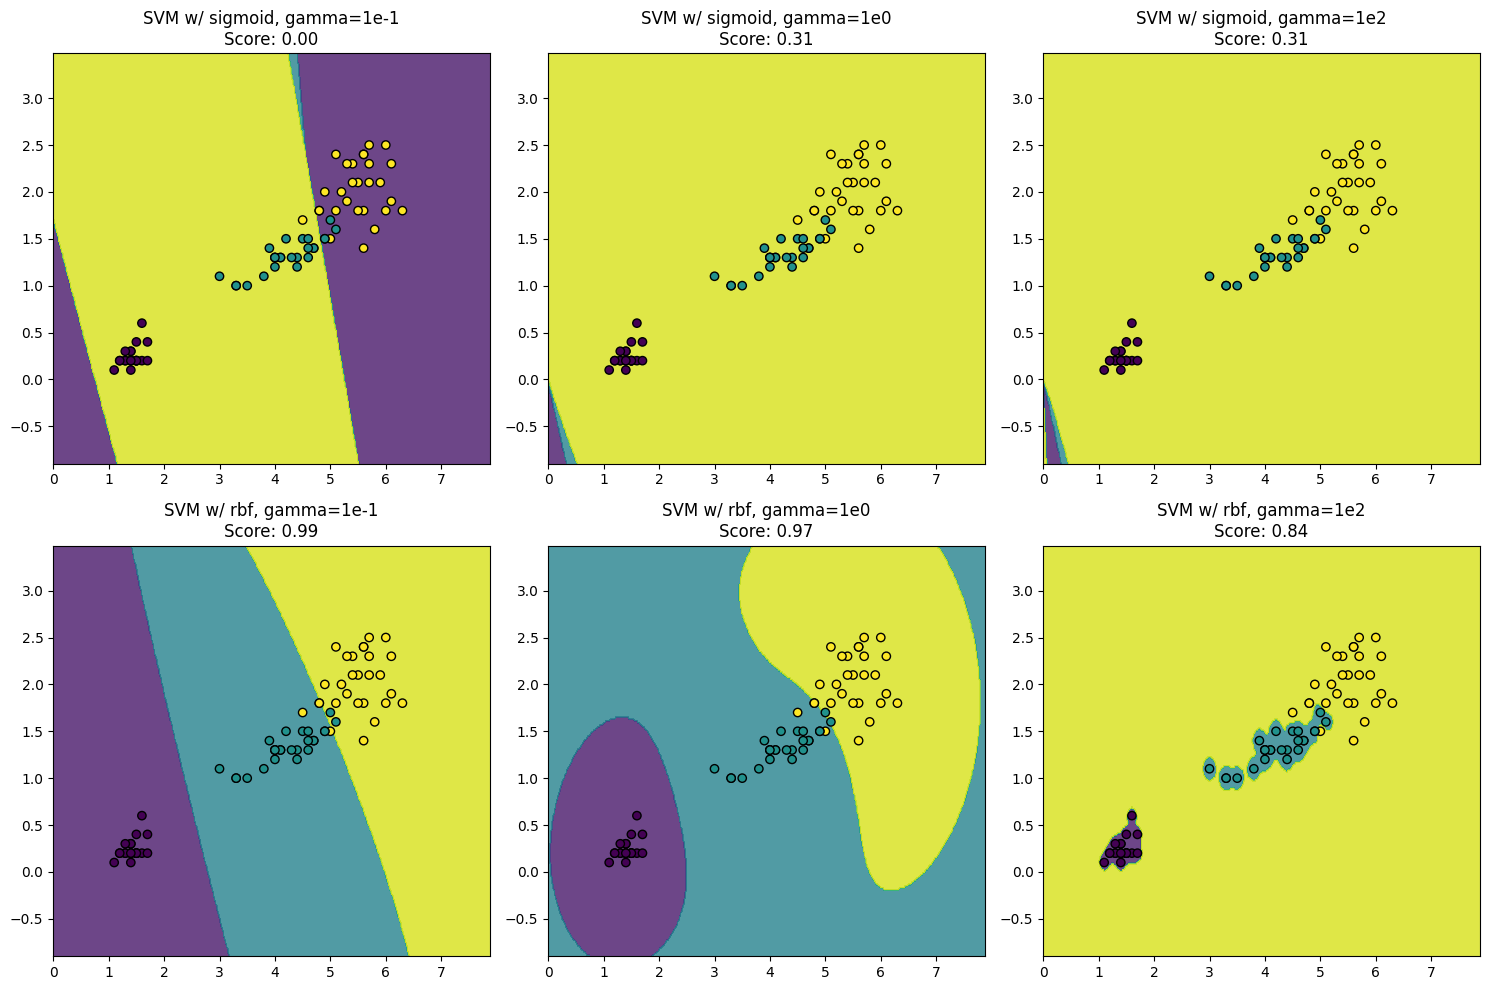

In [45]:
"""
Step 4: Compare six variations of SVM classifiers with kernels ['sigmoid', 'rfb'],
and gamma values [1e-1, 1e0, 1e2] by drawing a grid of six plots similar to the
one you obtained from step 1
"""
from sklearn.svm import SVC

classifiers = {
 'SVM w/ sigmoid, gamma=1e-1': SVC(kernel='sigmoid', gamma=1e-1),
 'SVM w/ sigmoid, gamma=1e0': SVC(kernel='sigmoid', gamma=1e0),
 'SVM w/ sigmoid, gamma=1e2': SVC(kernel='sigmoid', gamma=1e2),
 'SVM w/ rbf, gamma=1e-1': SVC(kernel='rbf', gamma=1e-1),
 'SVM w/ rbf, gamma=1e0': SVC(kernel='rbf', gamma=1e0),
 'SVM w/ rbf, gamma=1e2': SVC(kernel='rbf', gamma=1e2),
}

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for ax, (name, clf) in zip(axs.flatten(), classifiers.items()):
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)

  # Create a mesh grid for the scatter plot
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

  # Plot the decision boundary
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, alpha=0.8)

  # Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')

  # Set the title and score for the subplot
  ax.set_title(f'{name}\nScore: {score:.2f}')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimize

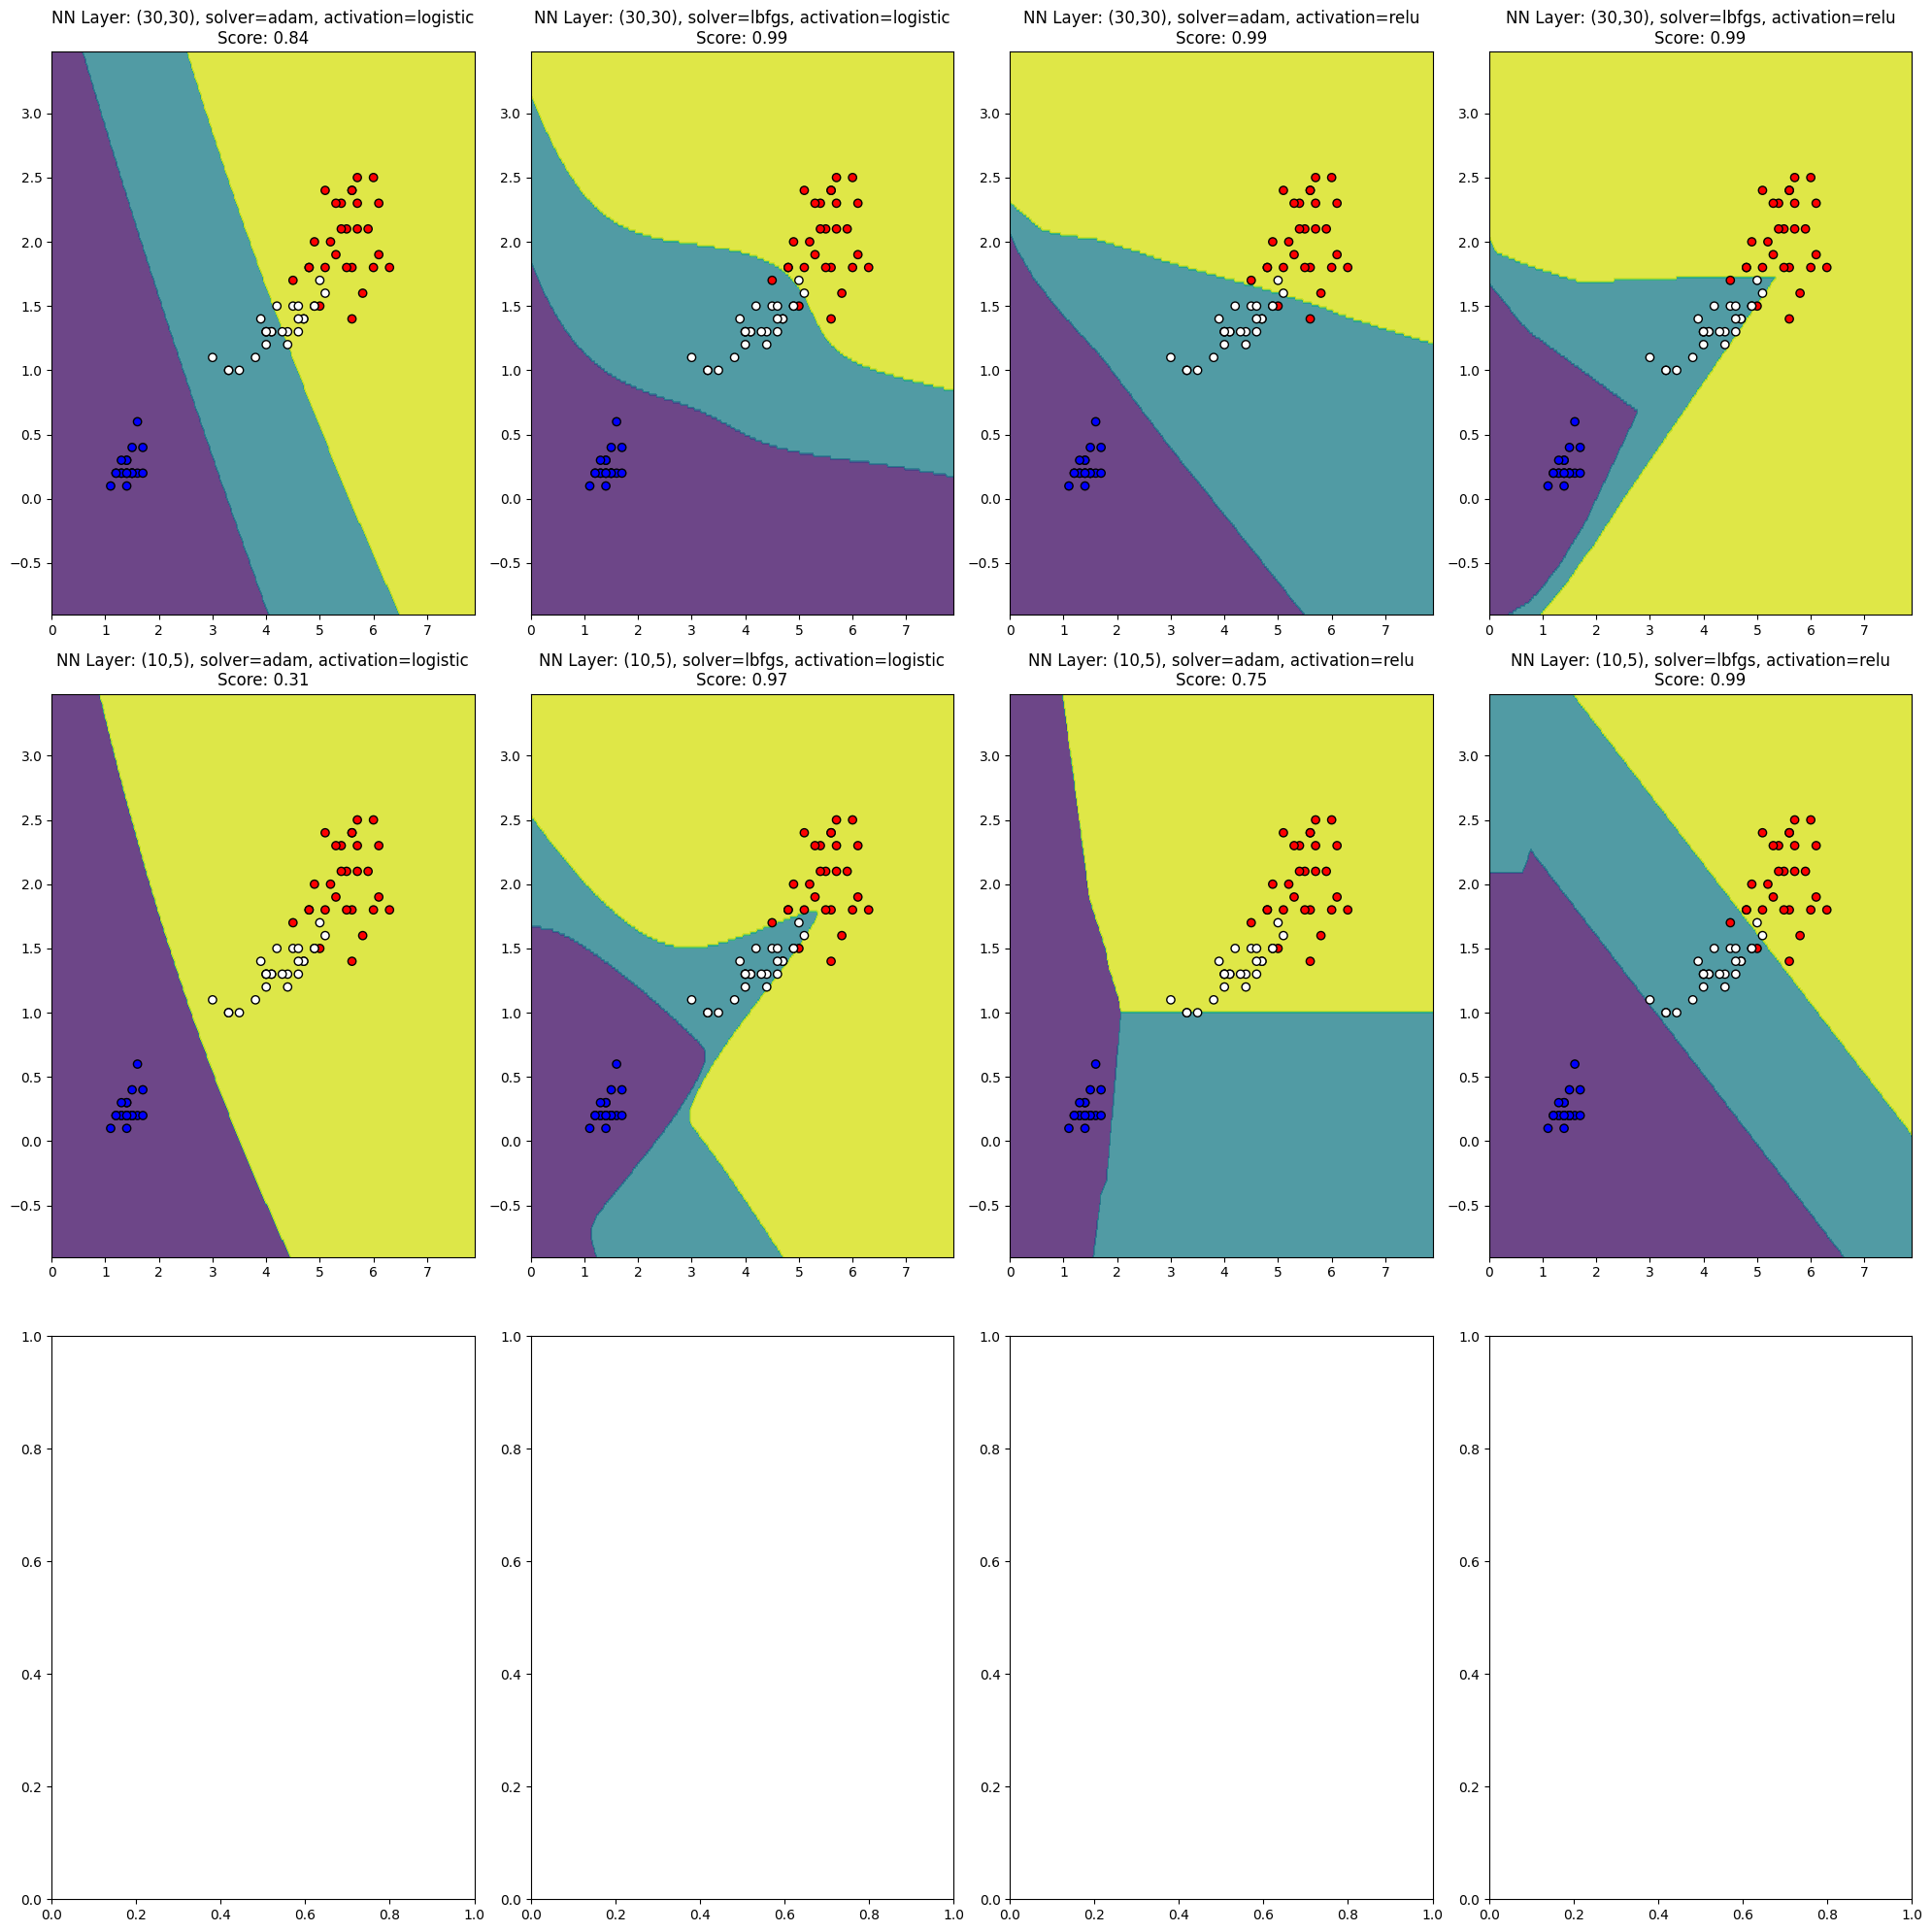

In [46]:
"""
Step 5: Compare eight variations of neural network MLP classifiers with default
alpha (1e-4), solvers ['adam', 'lbfgs'], activation ['logistic', 'relu'] and
layers [(30,30), (10,5)] by drawing a grid of eight plots similar to the one you
obtained from step 1.
"""

from sklearn.neural_network import MLPClassifier

# Define the classifiers
classifiers = {
 'NN Layer: (30,30), solver=adam, activation=logistic': MLPClassifier(alpha=1e-4, solver='adam', activation='logistic', hidden_layer_sizes=(30,30)),
 'NN Layer: (30,30), solver=lbfgs, activation=logistic': MLPClassifier(alpha=1e-4, solver='lbfgs', activation='logistic', hidden_layer_sizes=(30,30)),
 'NN Layer: (30,30), solver=adam, activation=relu': MLPClassifier(alpha=1e-4, solver='adam', activation='relu', hidden_layer_sizes=(30,30)),
 'NN Layer: (30,30), solver=lbfgs, activation=relu': MLPClassifier(alpha=1e-4, solver='lbfgs', activation='relu', hidden_layer_sizes=(30,30)),
 'NN Layer: (10,5), solver=adam, activation=logistic': MLPClassifier(alpha=1e-4, solver='adam', activation='logistic', hidden_layer_sizes=(10,5)),
 'NN Layer: (10,5), solver=lbfgs, activation=logistic': MLPClassifier(alpha=1e-4, solver='lbfgs', activation='logistic', hidden_layer_sizes=(10,5)),
 'NN Layer: (10,5), solver=adam, activation=relu': MLPClassifier(alpha=1e-4, solver='adam', activation='relu', hidden_layer_sizes=(10,5)),
 'NN Layer: (10,5), solver=lbfgs, activation=relu': MLPClassifier(alpha=1e-4, solver='lbfgs', activation='relu', hidden_layer_sizes=(10,5)),
}

fig, axs = plt.subplots(3, 4, figsize=(20, 20))

for ax, (name, clf) in zip(axs.flatten(), classifiers.items()):
 clf.fit(X_train, y_train)
 score = clf.score(X_test, y_test)

 # Create a mesh grid for the scatter plot
 x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

 # Plot the decision boundary
 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 Z = Z.reshape(xx.shape)
 ax.contourf(xx, yy, Z, alpha=0.8)

 # Plot the training points
 ax.scatter(X_train[:, 0], X_train[:, 1], c=[cmap[i] for i in y_train], edgecolors='k')

 # Set the title and score for the subplot
 ax.set_title(f'{name}\nScore: {score:.2f}')

plt.tight_layout()
plt.show()


In [ ]:
"""
THE END, THE ABOVE CELL MARKS THE END OF THE WORK
"""